# EDA (Exploratory Data Anaysis) 탐색적 데이터 분석

- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적인 분석을 통해서 데이터를 직관적으로 이해
- 데이터 자체가 가지고 있는 그대로의 의미를 파악

- 목적
  - 데이터 수집의사 결정
  - 데이터 맞는 모델 선정
  - 변수들 간 관계 파악

- 순서
  - 데이터 가져오기(모듈 세팅)
  - 데이터 정보 확인
  - 데이터 전처리
    - 결측치
    - 이상치 
  - 데이터 시각화 

## 1. 데이터 가져오기 (모듈 세팅)

In [ ]:
import pandas as pd

In [ ]:
out_df = pd.read_excel('outlier.xlsx')

In [ ]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


## 2. 데이터 확인

In [ ]:
out_df.head()

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [ ]:
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [ ]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [ ]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [ ]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [ ]:
out_df['국어'] = out_df['국어'].replace(-57, 57)

In [ ]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,57,48,67
9,10,100,87,93


In [ ]:
out_df = out_df.set_index('번호')

<BarContainer object of 3 artists>

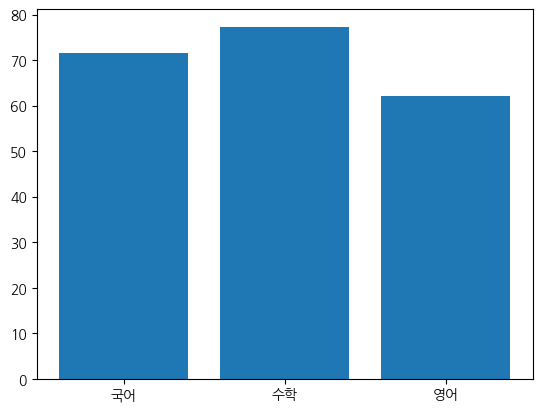

In [205]:
# 과목별 성적 평균

kor_mean = out_df['국어'].mean()
math_mean = out_df['수학'].mean()
eng_mean = out_df['영어'].mean()

plt.bar(out_df.mean().index, out_df.mean())

In [191]:
# 과목별 최대 / 최소

kor_max= out_df['국어'].max()
kor_min= out_df['국어'].min()

math_max= out_df['수학'].max()
math_min= out_df['수학'].min()

eng_max= out_df['영어'].max()
eng_min= out_df['영어'].min()

In [192]:
# 순서대로 -> 사분위값 -> 상위 몇 4%
# q1(25%), q2(50%), q3(75%)

q1 = out_df.quantile(0.25)
q1

국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64

In [193]:
q2 = out_df.quantile(0.50)
q2

국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64

In [194]:
q3 = out_df.quantile(0.75)
q3

국어    86.25
수학    99.25
영어    87.00
Name: 0.75, dtype: float64

In [196]:
# IQR

iqr = q3 - q1

#(-1.5 * iqr) < 데이터 < (1.5 * iqr)  -> 일반적인 데이터 허용 범위

iqr

국어    26.50
수학    45.00
영어    51.75
dtype: float64

In [207]:
limit = iqr *1.5

# -limit < data < limit
# for 조건
# if 값 > limit or 값 < -limit -> outlier

In [208]:
def outlier(out_df): # 코드 수정후 공유
  korean = out_df['국어']
  if korean > limit or korean < -(limit):
    return True
  return False

outlier(out_df)

ValueError: ignored

### 이상치 확인하기

- 이상치(outlier) : 사분위에서 특정 범위(+IQR * 1.5)를 초과하는 경우

In [ ]:
import matplotlib.pyplot as plt

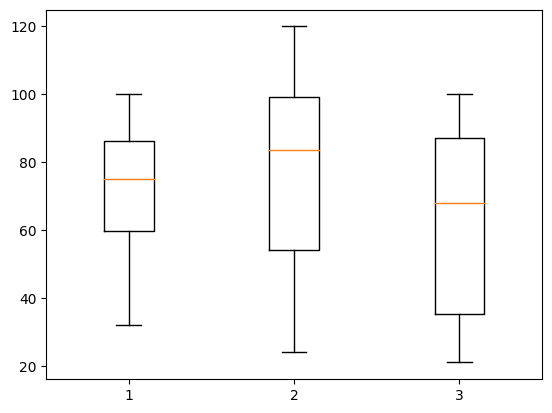

In [ ]:
# 이상치 확인 -> boxplot

plt.boxplot(out_df)
plt.show()

In [ ]:
out_df['국어'] = out_df['국어'].replace(810, 81)

In [ ]:
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


<function matplotlib.pyplot.show(close=None, block=None)>

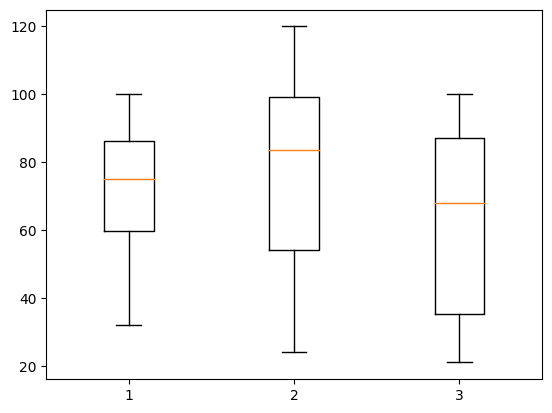

In [ ]:
plt.boxplot(out_df)
plt.show

## 데이터 불러오기

In [ ]:
weather_df = pd.read_csv('weather.csv', encoding='cp949')

In [ ]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [ ]:
weather_df.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


## 2. 데이터 정보 확인

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [ ]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [ ]:
weather_df = weather_df.set_index('일시')

In [ ]:
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


In [ ]:
# pd.to_datetime

weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [ ]:
# 결측치 컬럼별 갯수 확인
weather_df.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [ ]:
# return 값이 boolean -> boolean indexing
weather_df[weather_df.isna()]

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2010-12-27,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-28,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-29,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 최저기온의 어느 날짜가 비어있는 지
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [ ]:
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [ ]:
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [ ]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [ ]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isna()]

일시
2010-12-07   NaN
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
2010-12-14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [ ]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [ ]:
'''
나머지: 12월 8일 ~ 13일
평균 풍속: 12월 7일 ~ 14일
'''

### 결측값 위치 확인 - 날짜

In [ ]:
# 날짜 -> 12월 -> 결측

weather_df.loc['2010-12-07' : '2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


## 결측치 처리하기

In [ ]:
# 시간 흐름에 따른 데이터 -> 시계열
# 비어있는 값 앞뒤로 데이터 경향을 파악
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


### 일 강수량의 결측치를 0으로 채워주기

In [ ]:
# fillna(숫자) -> null값을 숫자로 변환
weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)
weather_df['일강수량(mm)'].isna().sum()  # 값이 채워졌는지 확인

0

### 기온

In [ ]:
weather_df.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-09,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-10,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-11,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-12,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-13,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,365.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.536986,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.711052,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.000000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [ ]:
weather_df.loc['2010-12-05':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,5.000000,5.000000,11.0,5.000000,3.000000,5.000000
mean,0.220000,6.760000,0.0,20.960000,6.400000,227.720000
std,2.200454,6.123153,0.0,7.358872,2.910326,137.437648
min,-2.900000,2.000000,0.0,8.400000,3.100000,14.100000
25%,-0.800000,2.000000,0.0,20.600000,5.300000,165.800000
50%,0.400000,2.900000,0.0,24.500000,7.500000,300.800000
75%,1.600000,13.100000,0.0,24.600000,8.050000,317.700000
max,2.800000,13.800000,0.0,26.700000,8.600000,340.200000


In [ ]:
# 최저기온, 최고기온의 결측값을 사분위값 50% 값으로 채워주세요.
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9)
weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4)

In [ ]:
weather_df.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-10,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-11,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-12,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-13,0.4,2.9,0.0,NaN,NaN,NaN


In [ ]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN


In [ ]:
weather_df.loc['2010-12-06':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,10.000000,10.000000,10.0,4.000000,2.000000,4.000000
mean,0.070000,3.740000,0.0,24.100000,8.050000,243.200000
std,1.187013,3.309985,0.0,2.544275,0.777817,153.583658
min,-2.900000,2.000000,0.0,20.600000,7.500000,14.100000
25%,0.400000,2.900000,0.0,23.525000,7.775000,229.125000
50%,0.400000,2.900000,0.0,24.550000,8.050000,309.250000
75%,0.400000,2.900000,0.0,25.125000,8.325000,323.325000
max,1.600000,13.100000,0.0,26.700000,8.600000,340.200000


In [ ]:
# 최대 순간 풍속을 평균값으로 채우기
weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.1)
weather_df['최대 순간 풍속(m/s)'].loc['2010-12-01':'2010-12-31']

일시
2010-12-01     6.3
2010-12-02     9.4
2010-12-03    18.4
2010-12-04     8.3
2010-12-05     8.4
2010-12-06    24.6
2010-12-07    20.6
2010-12-08    24.1
2010-12-09    24.1
2010-12-10    24.1
2010-12-11    24.1
2010-12-12    24.1
2010-12-13    24.1
2010-12-14    26.7
2010-12-15    24.5
2010-12-16    11.8
2010-12-17    13.8
2010-12-18    12.2
2010-12-19    11.9
2010-12-20     9.9
2010-12-21     8.6
2010-12-22     7.7
2010-12-23    21.1
2010-12-24    25.2
2010-12-25    18.2
2010-12-26    14.8
2010-12-27    20.3
2010-12-28    15.5
2010-12-29    19.1
2010-12-30    18.8
2010-12-31    19.2
Name: 최대 순간 풍속(m/s), dtype: float64

In [ ]:
weather_df['최대 순간 풍속(m/s)'].isna().sum()

0

In [ ]:
# 평균풍속의 12월 4일부터 18일가지 결측치를 평균값으로 채우기
# 이 날짜별 데이터 확인 -> 평균값 구하기 -> 채워주기

weather_df['평균 풍속(m/s)'].loc['2010-12-04':'2010-12-18'].describe()

count    7.000000
mean     4.642857
std      2.359984
min      2.900000
25%      3.250000
50%      3.400000
75%      5.550000
max      8.600000
Name: 평균 풍속(m/s), dtype: float64

In [ ]:
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.642857)

In [ ]:
weather_df['평균 풍속(m/s)'].loc['2010-12-04':'2010-12-18']

일시
2010-12-04    2.900000
2010-12-05    3.100000
2010-12-06    8.600000
2010-12-07    4.642857
2010-12-08    4.642857
2010-12-09    4.642857
2010-12-10    4.642857
2010-12-11    4.642857
2010-12-12    4.642857
2010-12-13    4.642857
2010-12-14    4.642857
2010-12-15    7.500000
2010-12-16    3.600000
2010-12-17    3.400000
2010-12-18    3.400000
Name: 평균 풍속(m/s), dtype: float64

In [ ]:
# 7 ~ 17일
weather_df.loc['2010-12-07':'2010-12-17'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000
mean,-0.481818,2.972727,0.454545,22.000000,4.694805,305.380000
std,1.389114,1.475189,1.507557,4.775353,1.037585,23.931506
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000
25%,-1.000000,2.450000,0.000000,22.350000,4.642857,284.100000
50%,0.400000,2.900000,0.000000,24.100000,4.642857,300.800000
75%,0.400000,2.900000,0.000000,24.100000,4.642857,317.700000
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000


In [ ]:
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.38)
weather_df['최대 순간 풍속 풍향(hhmi)'].isna().sum()

0

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


## 데이터 시각화

In [ ]:
# 한글 출력을 위한 추가 라이브러리

!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [ ]:
x = weather_df.index  # 시간순서
y1 = weather_df['최저기온(°C)']

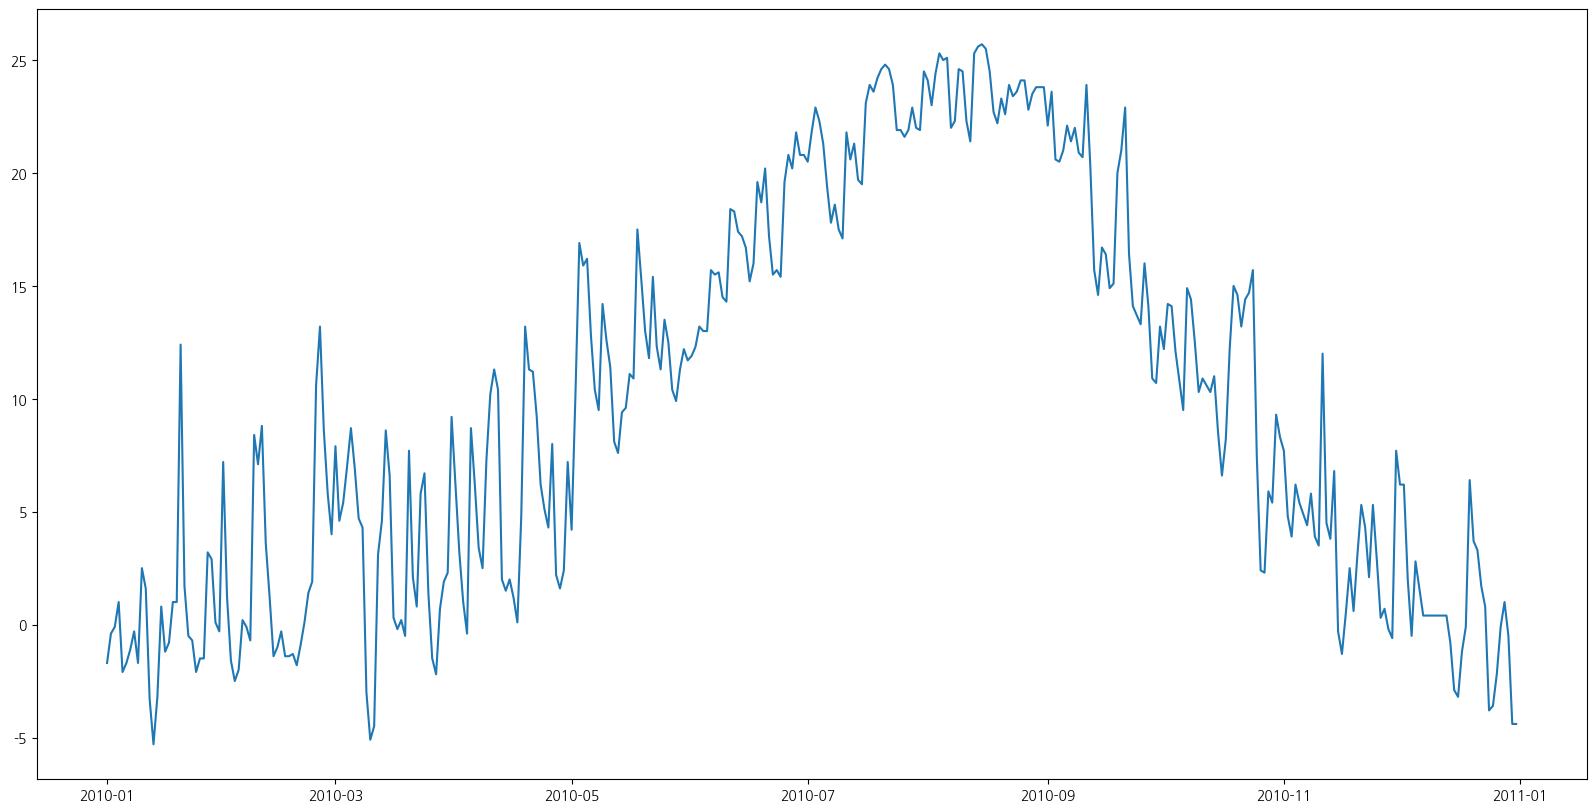

In [ ]:
# 하나의 셀 안에 어떻게 출력할 것인지

plt.figure(figsize=(20,10))  # 그래프 사이즈
plt.plot(x, y1)  # 그래프 그리기
plt.show()  # 그래프 출력

In [ ]:
# 그래프 변수

x = weather_df.index

y1 = weather_df['최저기온(°C)']
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']

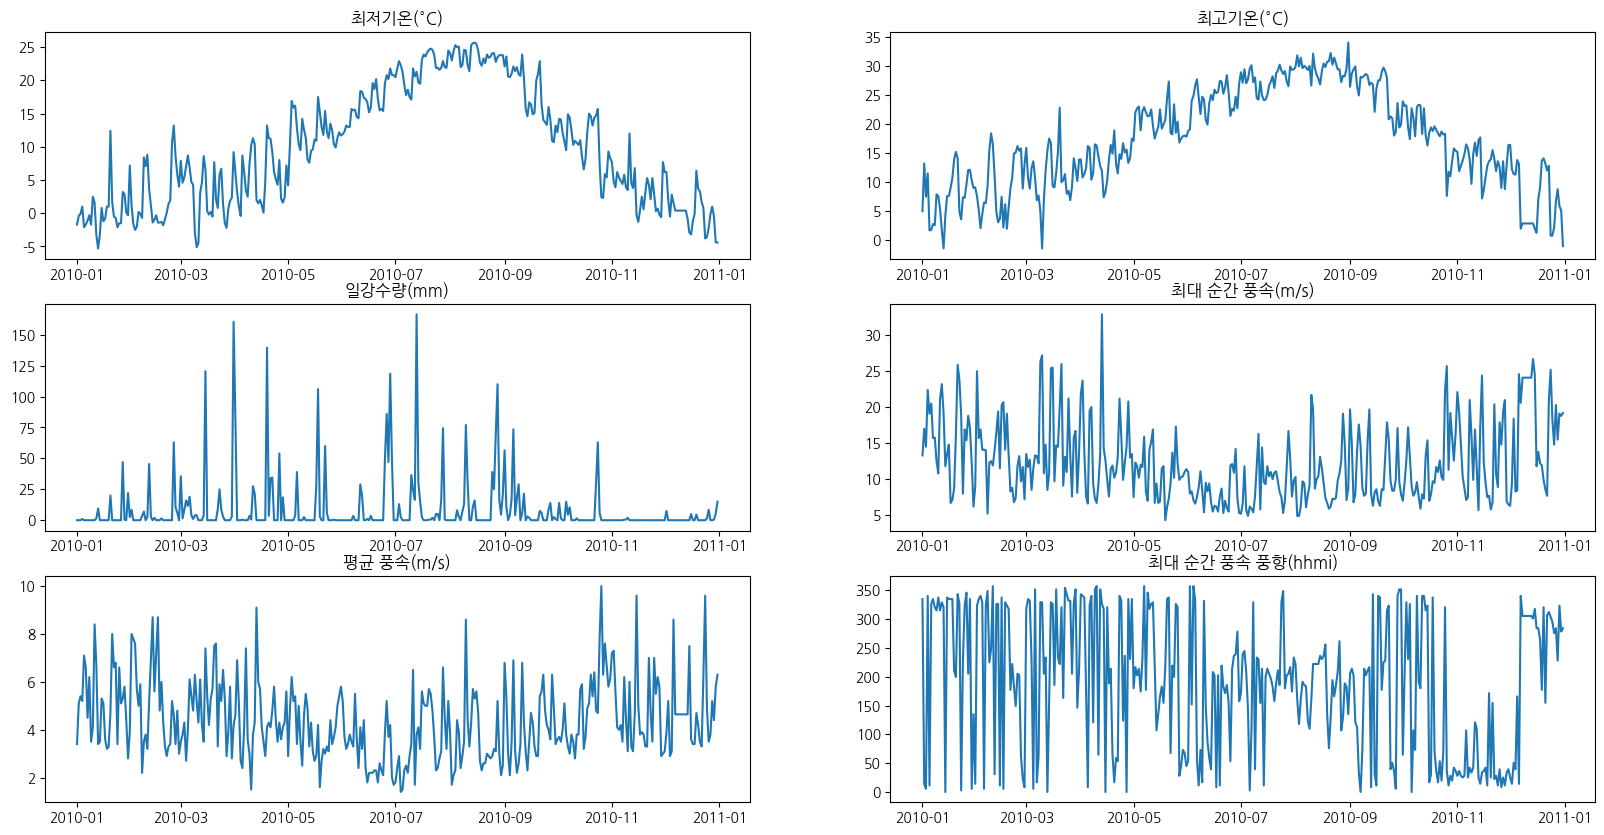

In [ ]:
plt.figure(figsize = (20,10))

# subplots 
# plt.subplot(행, 열, 인덱스)
plt.subplot(3, 2, 1)
plt.title('최저기온(°C)')
plt.plot(x, y1)

plt.subplot(3, 2, 2)
plt.title('최고기온(°C)')
plt.plot(x, y2)

plt.subplot(3, 2, 3)
plt.title('일강수량(mm)')
plt.plot(x, y3)

plt.subplot(3, 2, 4)
plt.title('최대 순간 풍속(m/s)')
plt.plot(x, y4)

plt.subplot(3, 2, 5)
plt.title('평균 풍속(m/s)')
plt.plot(x, y5)

plt.subplot(3, 2, 6)
plt.title('최대 순간 풍속 풍향(hhmi)')
plt.plot(x, y6)

plt.show()

In [ ]:
# group by : 기준 데이터 -> (처리할) 수치 데이터
# 월별 / 기온, 풍속...

In [ ]:
weather_df.index # DatetimeIndex

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='일시', length=365, freq=None)

In [ ]:
weather_date = pd.Series(weather_df.index)
weather_date

0     2010-01-01
1     2010-01-02
2     2010-01-03
3     2010-01-04
4     2010-01-05
         ...    
360   2010-12-27
361   2010-12-28
362   2010-12-29
363   2010-12-30
364   2010-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [ ]:
weather_date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: 일시, Length: 365, dtype: int64

In [ ]:
weather_df['월'] = weather_date.dt.month # 인덱스가 다르기때문에 값이 들어가지 않음

In [ ]:
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,NaN
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,NaN
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,NaN
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,NaN
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,NaN
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,NaN
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,NaN
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,NaN


In [ ]:
weather_df['월'] = weather_date.dt.month.values

In [ ]:
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


In [ ]:
# groupby
month_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()

In [ ]:
# 최고기온
month_high_temp = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()


In [ ]:
# 일강수량
month_daily_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()


In [ ]:
# 최대순간풍속
month_wind_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()


In [ ]:
# 평균풍속
month_wind_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()


In [ ]:
# 최대순간풍속
month_wind_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

In [ ]:
x_month = weather_df['월'].unique()

In [ ]:
month_high_temp.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='월')

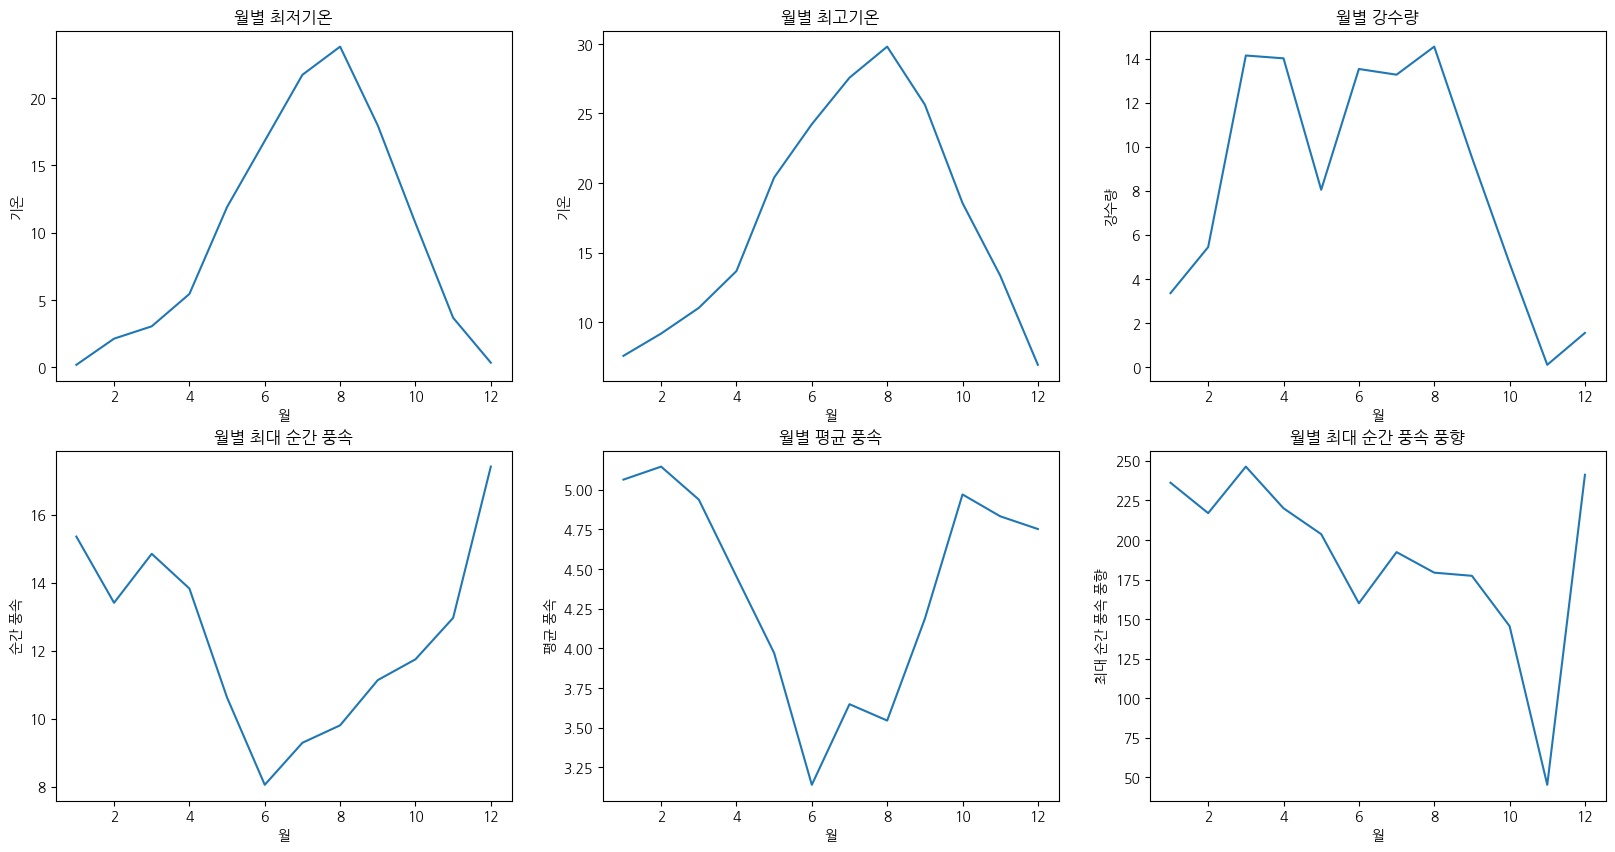

In [ ]:
# 그룹바이 월별 데이터 -> 1월 데이터들 -> 그래프

plt.figure(figsize=(20,10))

# 1
plt.subplot(2, 3, 1)
plt.title('월별 최저기온') 
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_low_temp)

# 2
plt.subplot(2, 3, 2)
plt.title('월별 최고기온') 
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_high_temp)

# 3
plt.subplot(2, 3, 3)
plt.title('월별 강수량') 
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(x_month, month_daily_vol)

# 4
plt.subplot(2, 3, 4)
plt.title('월별 최대 순간 풍속') 
plt.ylabel('순간 풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_speed)

# 5
plt.subplot(2, 3, 5)
plt.title('월별 평균 풍속') 
plt.ylabel('평균 풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_mean)

# 6
plt.subplot(2, 3, 6)
plt.title('월별 최대 순간 풍속 풍향') 
plt.ylabel('최대 순간 풍속 풍향')
plt.xlabel('월')
plt.plot(x_month, month_wind_dic)

In [ ]:
month_low_temp

월
False    10.763473
True      0.190323
Name: 최저기온(°C), dtype: float64

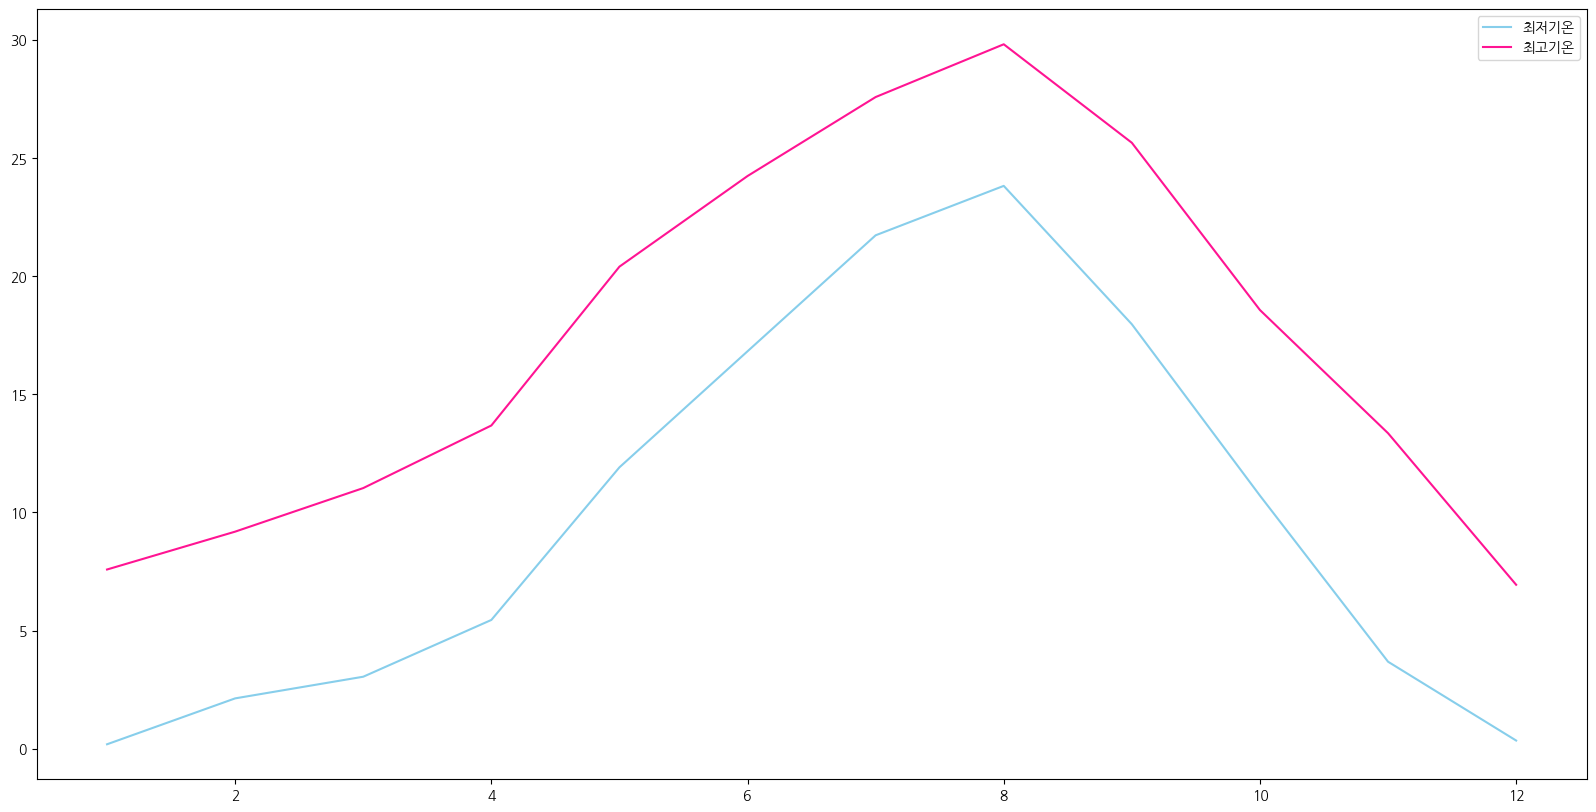

In [ ]:
# 기온 그래프를 하나의 그래프로 표시

plt.figure(figsize = (20, 10))

plt.plot(x_month, month_low_temp , 'skyblue', label='최저기온')
plt.plot(x_month, month_high_temp, 'deeppink', label='최고기온')
plt.legend(loc='upper right')
# 색상: b: blue, r: red, y: yellow, w: white ... 
# 선: --: dash line, -.: dash dot, : - dot ...
# 범례 위치 : upper left / upper center / ceter(left, right), lower(left, right)...

plt.show()

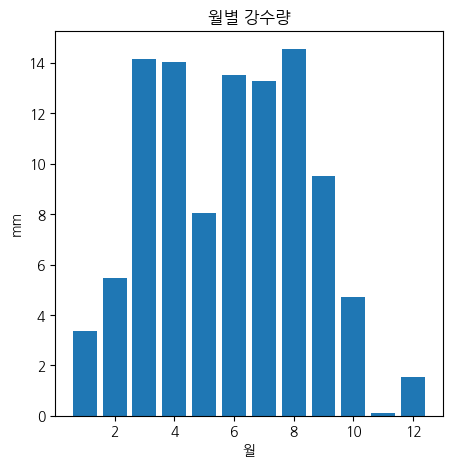

In [ ]:
# 일강수량을 바 그래프로 나타내기 -> 데이터 타입에 따라 적절한 그래프 선택하기

plt.figure(figsize=(5, 5))
plt.title('월별 강수량')
plt.ylabel('mm')
plt.xlabel('월')
plt.bar(x_month, month_daily_vol)

plt.show()

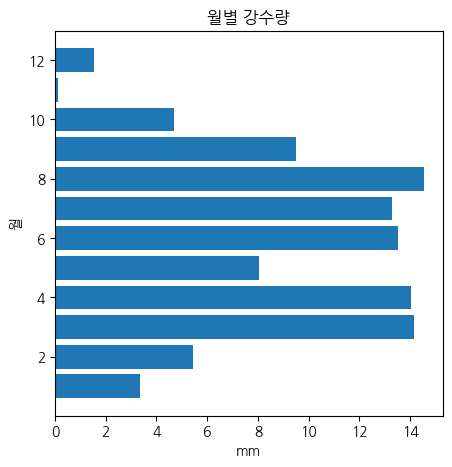

In [ ]:
# 일강수량을 바 그래프로 나타내기 -> 데이터 타입에 따라 적절한 그래프 선택하기

plt.figure(figsize=(5, 5))
plt.title('월별 강수량')
plt.xlabel('mm')
plt.ylabel('월')
plt.barh(x_month, month_daily_vol)

plt.show()

In [ ]:
# 인덱스 -> 월 -> 1 -> 1월 데이터만 뽑아온다 -> 31개의 데이터 (0~31) 1일 ~ 31일
# 1월 데이터 -> 31개

# 인덱스 1월 해당 (조건) -> 일별 날짜: OK

# groupby: 기준 -> 범위를 나눠서 수치를 분석
# 1월 데이터 -> groupby (x): 비교가 아니고 조건

In [ ]:
# 1월 데이터
month_1 = weather_df[weather_df['월'] == 1]

In [ ]:
month_1.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1


In [ ]:
month_1.tail()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-27,3.2,12.1,47.0,18.8,5.3,205.3,1
2010-01-28,2.9,12.1,0.5,17.2,5.8,334.7,1
2010-01-29,0.1,10.3,0.0,12.2,4.4,5.5,1
2010-01-30,-0.3,9.0,22.0,6.2,2.8,135.0,1
2010-01-31,7.2,9.1,2.5,9.0,3.9,14.1,1


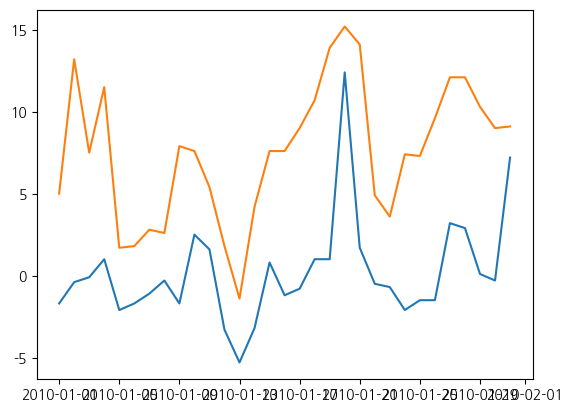

In [ ]:
plt.plot(month_1['최저기온(°C)'])
plt.plot(month_1['최고기온(°C)'])
plt.show()

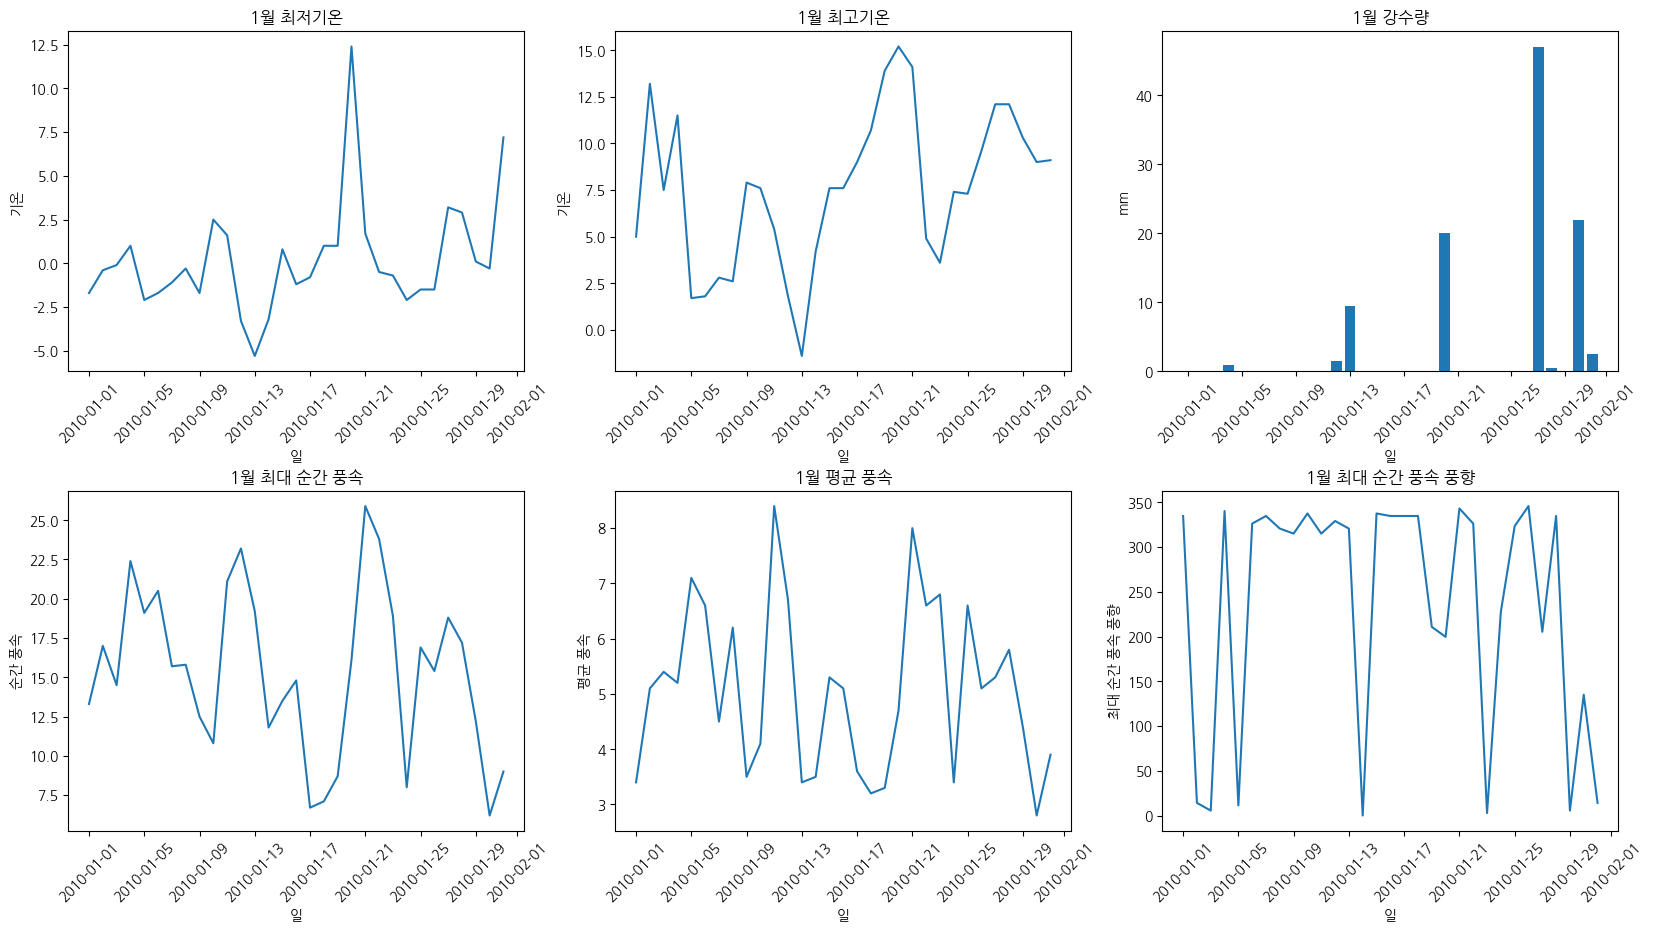

In [183]:
# 그룹바이 월별 데이터 -> 1월 데이터들 -> 그래프

plt.figure(figsize=(20,10))

plt.subplots_adjust(left=0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.35)

# 1
plt.subplot(2, 3, 1)
plt.title('1월 최저기온') 
plt.ylabel('기온')
plt.xlabel('일')
plt.xticks(rotation=45)
plt.plot(month_1['최저기온(°C)'])

# 2
plt.subplot(2, 3, 2)
plt.title('1월 최고기온') 
plt.ylabel('기온')
plt.xlabel('일')
plt.xticks(rotation=45)
plt.plot(month_1['최고기온(°C)'])

# 3
plt.subplot(2, 3, 3)
plt.title('1월 강수량') 
plt.ylabel('mm')
plt.xlabel('일')
plt.xticks(rotation=45)
plt.bar(month_1.index, month_1['일강수량(mm)']) # bar 그래프는 x, y 를 입력해야함

# 4
plt.subplot(2, 3, 4)
plt.title('1월 최대 순간 풍속') 
plt.ylabel('순간 풍속')
plt.xlabel('일')
plt.xticks(rotation=45)
plt.plot(month_1['최대 순간 풍속(m/s)'])

# 5
plt.subplot(2, 3, 5)
plt.title('1월 평균 풍속') 
plt.ylabel('평균 풍속')
plt.xlabel('일')
plt.xticks(rotation=45)
plt.plot(month_1['평균 풍속(m/s)'])

# 6
plt.subplot(2, 3, 6)
plt.title('1월 최대 순간 풍속 풍향') 
plt.ylabel('최대 순간 풍속 풍향')
plt.xlabel('일')
plt.xticks(rotation=45)
plt.plot(month_1['최대 순간 풍속 풍향(hhmi)'])

### 제주도 음식점

- 한국 관광 데이터 랩

### 데이터 가져오기(모듈 세팅)

In [222]:
food = pd.read_excel('jeju_food.xlsx')

In [223]:
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [224]:
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


### 데이터 정보 확인

In [225]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [226]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [227]:
food.isna().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

### 데이터 전처리

In [228]:
# 광역시/도 컬럼 제거

food = food.drop('광역시/도', axis = 1)
food

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


In [229]:
# 중분류 카테고리
food['중분류 카테고리'].unique()

array(['음식'], dtype=object)

In [230]:
food = food.drop('중분류 카테고리', axis = 1)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


In [232]:
# 소분류 카테고리
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [233]:
food['시/군/구'].value_counts()

제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

In [241]:
# 내부 컬럼을 인덱스로

food = food.set_index('순위')
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [245]:
# food -> 소부류 카테고리 = 한식
# head, slicing, iloc, loc(어려움)
food[food['소분류 카테고리'] == '한식']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [244]:
# food -> 소분류 카테고리 = 카페/찻집 -> dataFrame

food[food['소분류 카테고리'] == '카페/찻집']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [247]:
#.str.contains('keyword') -> boolean  -> boolean indexing

# 제주도 내 스타벅스의 순위를 찾아보세요

food[food['관광지명'].str.contains('스타벅스')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [248]:
food[food['관광지명'].str.contains('스타벅스')].describe()

,검색건수
count,23.000000
mean,14532.173913
std,9023.124810
min,4427.000000
25%,8486.500000
50%,12585.000000
75%,20673.000000
max,31720.000000


In [249]:
food[food['관광지명'].str.contains('스타벅스')].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [254]:
# 한식 -> 국수

korean_food = food[food['소분류 카테고리'] == '한식']
korean_food[korean_food['관광지명'].str.contains('국수')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
34,가시아방국수,서귀포시,제주 서귀포시 섭지코지로 10-0,한식,21554
68,국수바다본점,서귀포시,제주 서귀포시 일주서로 982-0,한식,14324
82,제주순메밀막국수,서귀포시,제주 서귀포시 녹차분재로 60-0,한식,12713
83,한림칼국수,제주시,제주 제주시 한림해안로 141-0,한식,12656
100,하갈비국수,제주시,제주 제주시 애월북서길 52-0,한식,10224
112,삼대국수회관본점,제주시,제주 제주시 삼성로 41-0,한식,9711


## 파이 그래프

In [255]:
# pie graph
# plt.pie(비율, 레이블)

In [256]:
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [257]:
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcd110502b0>,
 [Text(0.27355891977302554, 1.065441465972024, '한식'),
  Text(-0.9893458311051142, -0.4808272314199052, '카페'),
  Text(0.32674559497684563, -1.0503510442529334, '전문음식'),
  Text(0.9672478679326338, -0.5238621593317982, '간이음식'),
  Text(1.0929724232889946, -0.12414218432822406, '외국식'),
  Text(1.0998045845823716, -0.020733444759549666, '음식점기타')])

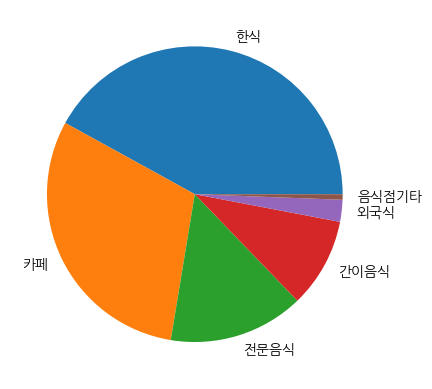

In [269]:
label = ['한식','카페','전문음식','간이음식','외국식', '음식점기타']
pie = food['소분류 카테고리'].value_counts()

plt.pie(pie, labels = label)